In [1]:
# IMPORT STATEMENTS
import os
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np

import numpy.ma as ma
import scipy
import pandas as pd

import bone
%load_ext autoreload

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        

In [2]:
sys.path.insert(0, os.getcwd()+"/Scripts")
from neuAnalysis import NeuAnalysis
from ViolinPlot import *

ran NeuAnalysis
ran ViolinPlot.py


In [3]:
dataset=[
 ['COV192', 'c nasal.neutrophil.percentage'],
 ['COV247', 'c anc'],
 ['COV257', 'c anc'],
 ['COV314', 'c per neutrophils'],
 ['COV314', 'c abs neutrophils'],
 ['MACV296', 'c blood neutrophil count (cells/ul)'],
 ['MACV296', 'c sputum differential neutrophil count %'],
 ['MACV305', 'c neutrophl_pct'],
 ['MACV306', 'c neutrophils_count'],
 ['MACV307', 'c neutrophil_count'],
 ['MACV307', 'c neutrophil_percent'],
 ['MACV308', 'c neu (10e9/l)'],
 ['MACV309', 'c neutrophil'],
 ['MACV309', 'c neutrophils'],
 ['MACV310', 'c neutrophil count'],
 ['COV429', 'c Neutrophil'],
 ['MACV331', 'c diff cell count neutrophils (%)'],
 ['MACV332', 'c neutrophils']
]

In [4]:
wrong_type = ['NA', 'Not Applicable', 'Data Not Available','unknown', 'Missing Data', ' NA ', '','NaN']
def remove_wrong_type_values(list1, list2, wrong_type=wrong_type):
    # Create a copy of the lists to avoid modifying them directly
    list1_copy = list1[:]
    list2_copy = list2[:]

    # Iterate over the zipped lists in reverse order
    for index, (item1, item2) in reversed(list(enumerate(zip(list1, list2)))):
        if item1 in wrong_type or item2 in wrong_type:
            # Delete the elements at the current index from both lists
            del list1_copy[index]
            del list2_copy[index]

    return list1_copy, list2_copy


In [5]:
becc=['KCNJ15', 'NAMPT', 'DYSF', 'BASP1', 'TNFRSF1A']

In [6]:
LM22=['AIF1',
  'APOBEC3A',
  'AQP9',
  'BTNL8',
  'C5AR1',
  'CAMP',
  'CASP5',
  'CCR3',
  'CDA',
  'CEACAM3',
  'CFP',
  'CHI3L1',
  'CHST15',
  'CLC',
  'CREB5',
  'CSF3R',
  'CXCR1',
  'CXCR2',
  'DPEP2',
  'EMR2',
  'EMR3',
  'FAM212B',
  'FCGR3B',
  'FFAR2',
  'FPR1',
  'FPR2',
  'GPR97',
  'HAL',
  'HSPA6',
  'IGSF6',
  'IL18RAP',
  'LILRA2',
  'LILRB2',
  'LST1',
  'MAK',
  'MEFV',
  'MGAM',
  'MMP25',
  'MNDA',
  'MXD1',
  'NCF2',
  'NFE2',
  'P2RY13',
  'P2RY14',
  'PADI4',
  'PGLYRP1',
  'PLEKHG3',
  'QPCT',
  'REPS2',
  'S100A12',
  'STEAP4',
  'TLR2',
  'TLR8',
  'TNFAIP6',
  'TNFRSF10C',
  'TREM1',
  'TREML2',
  'VNN1',
  'VNN2',
  'VNN3']

In [33]:
len(LM22)

60

In [7]:
alt1=['ITGAM','FCGR3A','CEACAM8']
alt2=['FCGR3A']
alt3=['FCGR1A']
alt4=['CMTM2','FOS','PIK3CB','SOS2','TLR4','IL18R1','CMTM6','FPR1']

In [8]:
whole_dataset = [
#     ["COV192.2", "c blood.neutrophil.differential"],
    ["COV192", "c nasal.neutrophil.percentage"],
    ["COV247", "c anc"], ["COV257", "c anc"],
    ["COV314", "c per neutrophils"],
    ["COV314", "c abs neutrophils"],
    ["MACV296", 'c blood neutrophil count (cells/ul)'],
    ["MACV296", 'c sputum differential neutrophil count %'],
#     ["MACV305", 'c neutrophl_pct'], 
    ["MACV306", 'c neutrophils_count'],
    ["MACV307", 'c neutrophil_count'],
    ["MACV307", 'c neutrophil_percent'],
    ["MACV308", 'c neu (10e9/l)'],
    ["MACV309", 'c neutrophil'],
    ["MACV309", 'c neutrophils'],
    ["MACV310", 'c neutrophil count'],
    ['COV429', 'c Neutrophil'],
    ['MACV331', 'c diff cell count neutrophils (%)'],
    ['MACV332', 'c neutrophils']
]

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
[5]
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
[8]
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
[5]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[8]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[8]
Kho 2022 asthma (n = 46)
GSE184433 http://hege

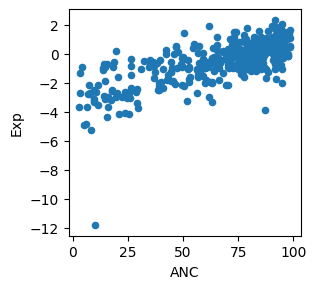

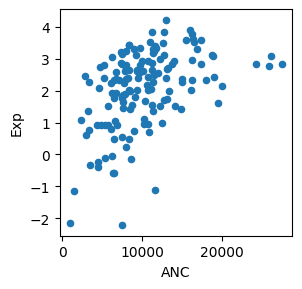

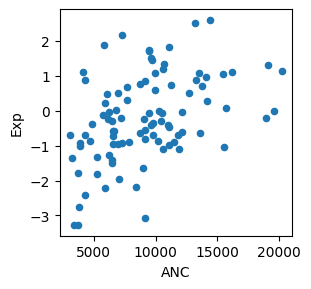

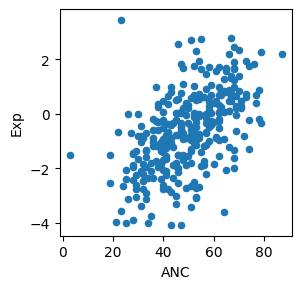

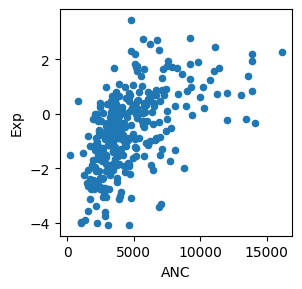

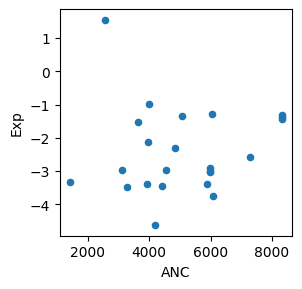

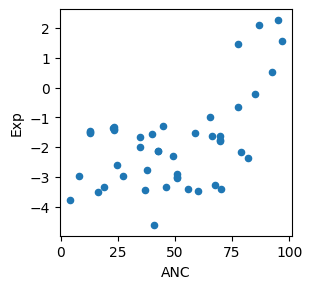

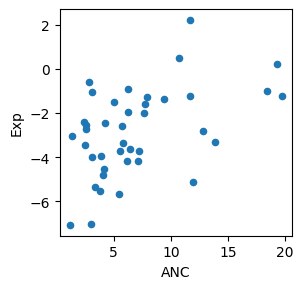

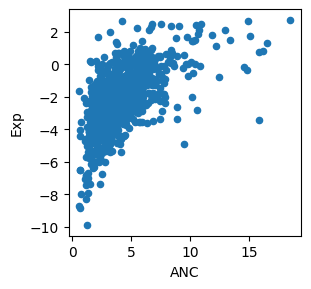

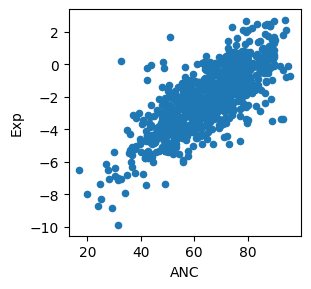

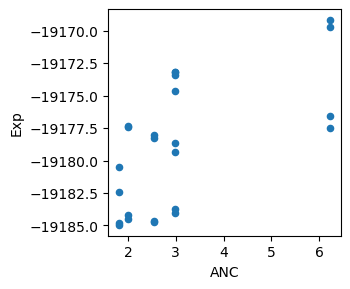

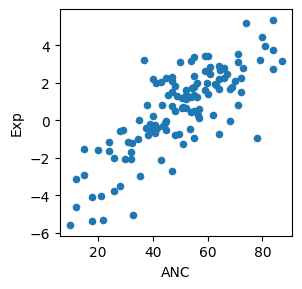

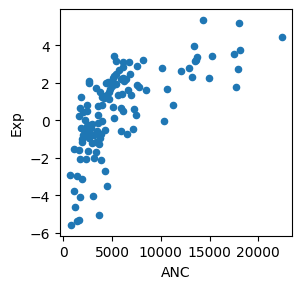

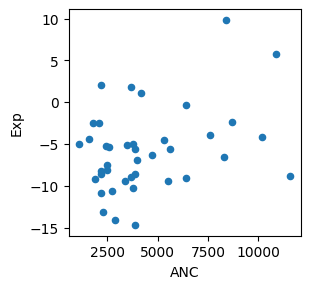

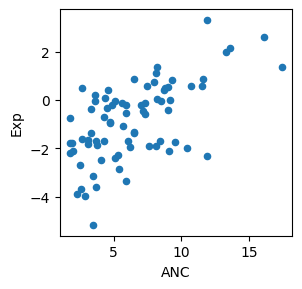

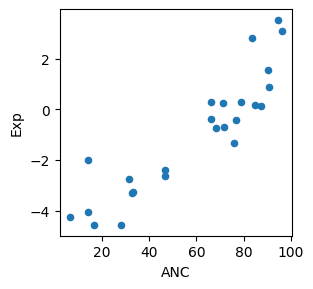

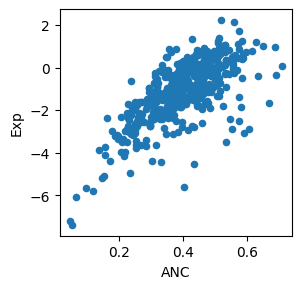

In [9]:
res_becc = {}
for id1 in whole_dataset:
    ana = bone.IBDAnalysis()
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    wt1, l1 = [1], [['KCNJ15', 'NAMPT', 'DYSF', 'BASP1', 'TNFRSF1A']]
    ana.order = ana.h.aRange()
    ana.orderData(l1, wt1)
    expr = ["", ""] + list(ana.f_ranks)
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,ax = plt.subplots(figsize=(3,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=ax)
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    res_becc[id1[0]] = corr1


In [10]:
np.mean(list(res_becc.values()))

0.599415998411992

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
[80]
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
[104]
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
[56]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[104]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[104]
Kho 2022 asthma (n = 46)
GSE184433 htt

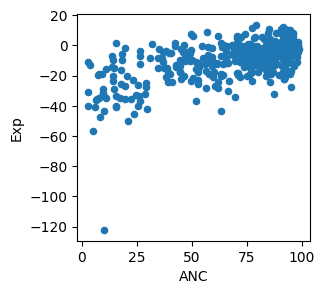

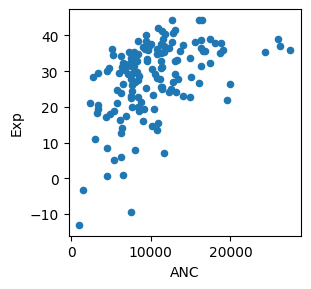

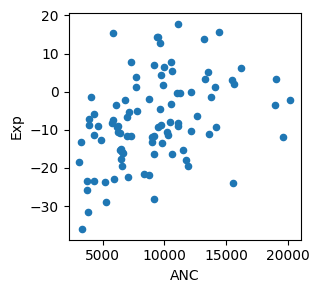

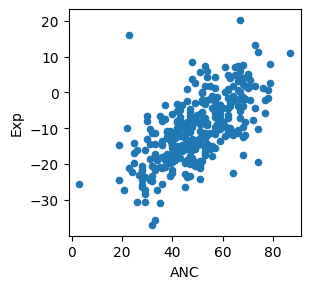

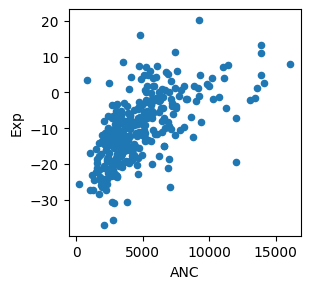

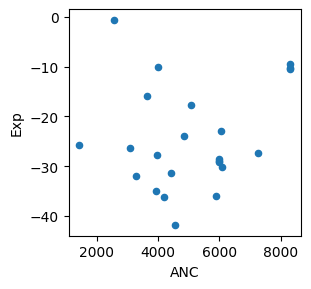

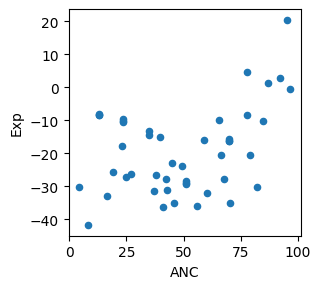

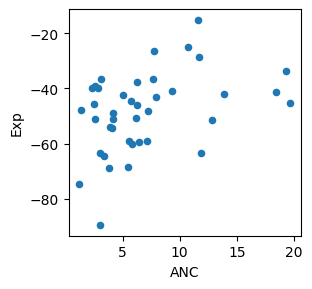

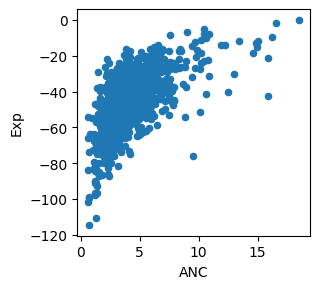

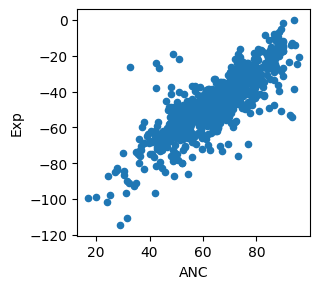

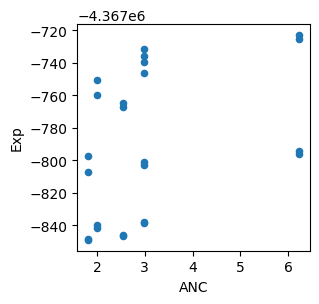

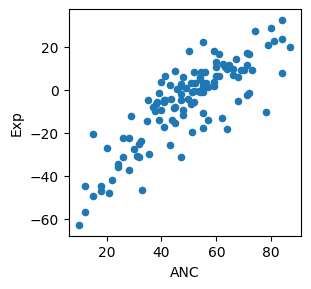

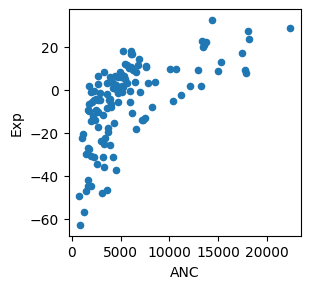

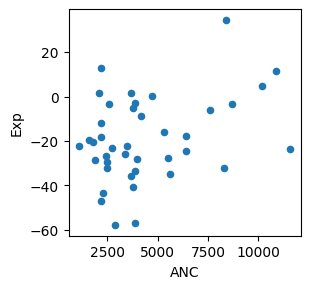

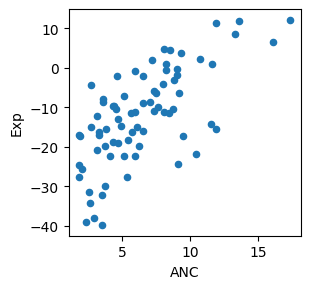

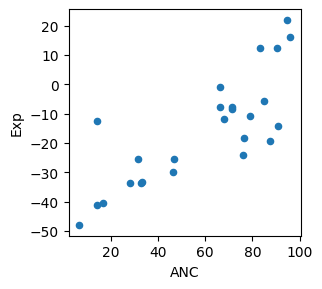

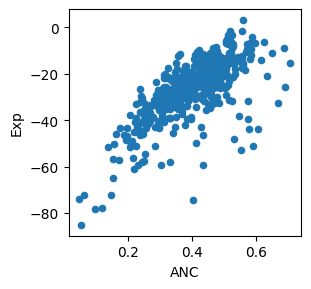

In [11]:
res_LM22 = {}
for id1 in whole_dataset:
    ana = bone.IBDAnalysis()
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    wt1, l1 = [1], [LM22]
    ana.order = ana.h.aRange()
    ana.orderData(l1, wt1)
    expr = ["", ""] + list(ana.f_ranks)
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,ax = plt.subplots(figsize=(3,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=ax)
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    res_LM22[id1[0]] = corr1


In [12]:
np.mean(list(res_LM22.values()))

0.5557078371680152

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
[11]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
[4]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
[3]


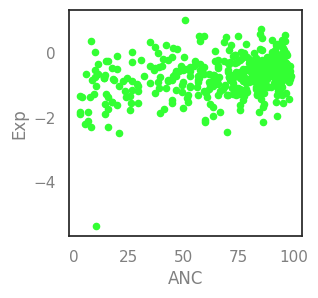

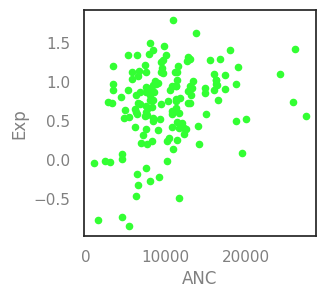

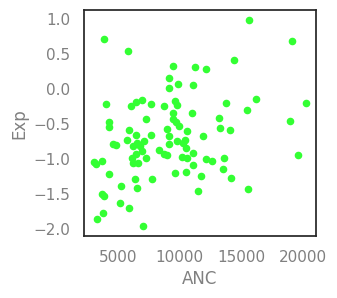

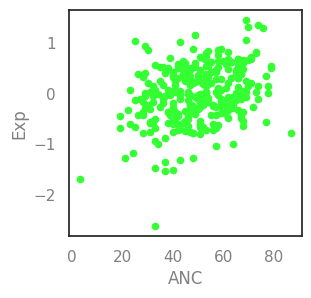

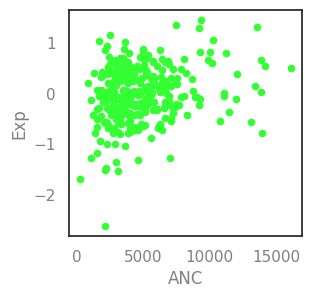

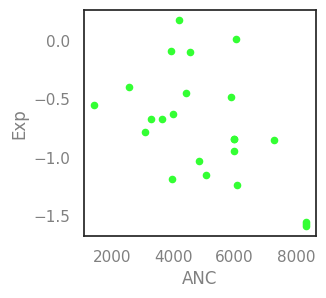

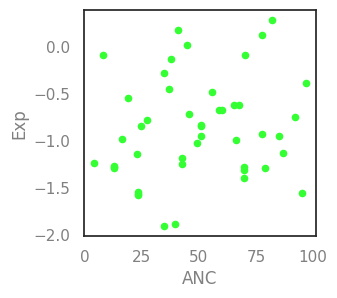

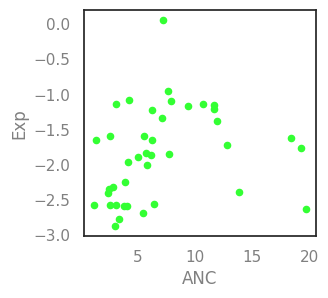

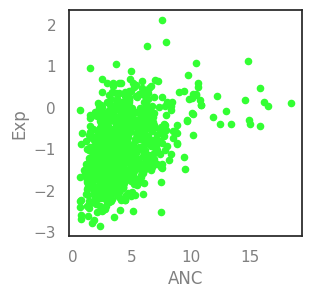

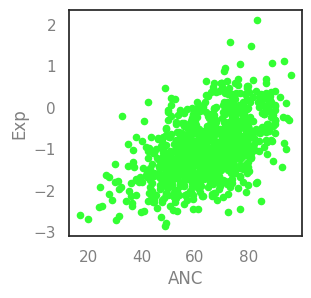

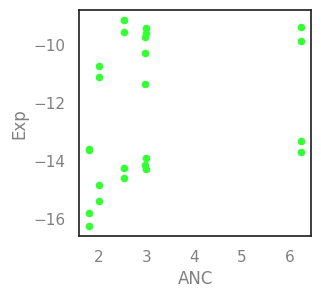

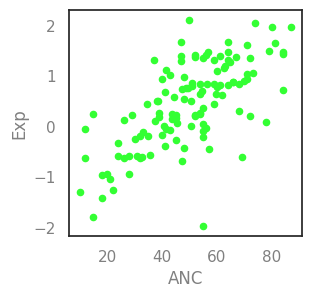

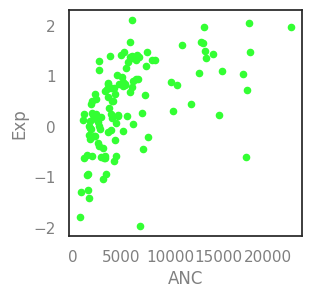

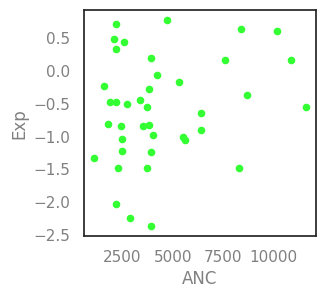

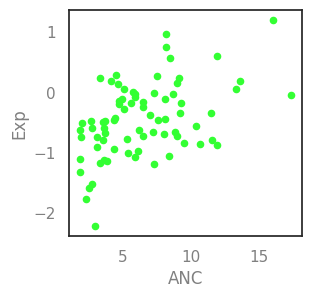

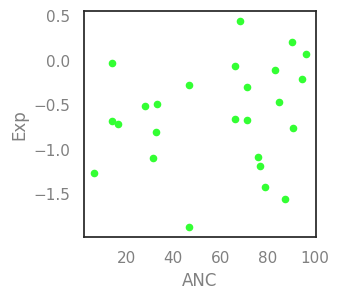

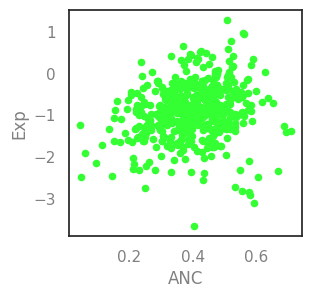

In [48]:
res_alt1 = {}
for id1 in whole_dataset:
    ana = bone.IBDAnalysis()
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    wt1, l1 = [1], [alt1]
    ana.order = ana.h.aRange()
    ana.orderData(l1, wt1)
    expr = ["", ""] + list(ana.f_ranks)
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,ax = plt.subplots(figsize=(3,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=ax)
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    res_alt1[id1[0]] = corr1

In [19]:
np.mean(list(res_alt1.values()))

0.3050263760962632

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
[5]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
[2]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
[1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
[1]


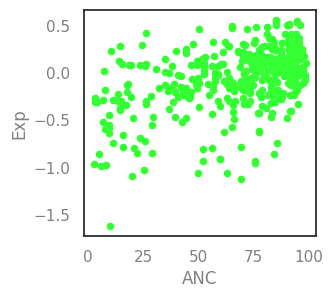

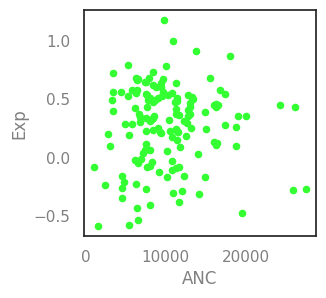

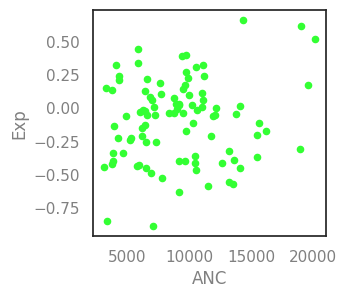

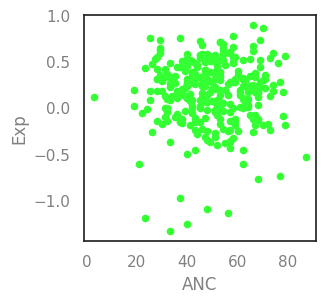

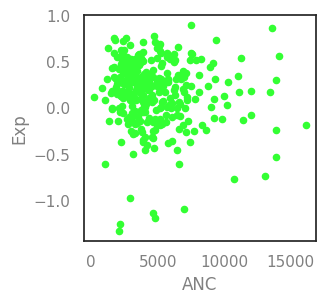

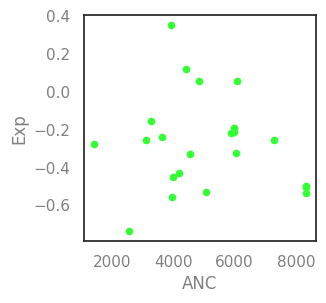

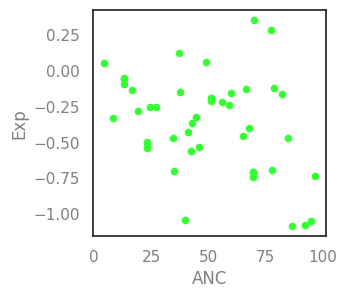

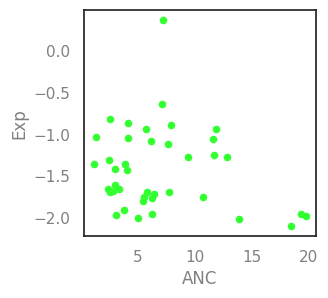

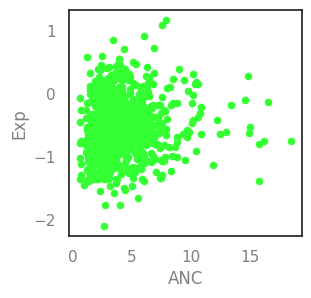

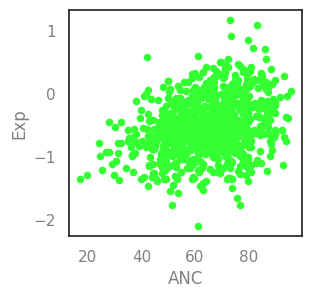

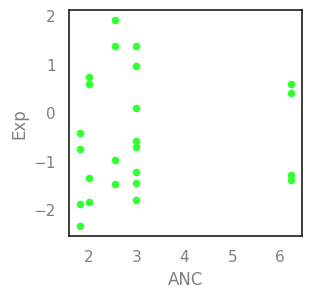

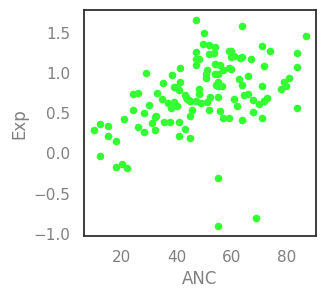

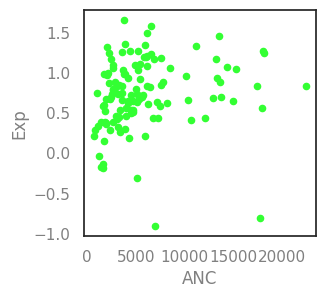

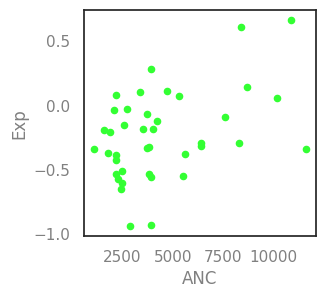

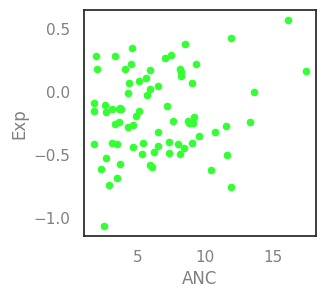

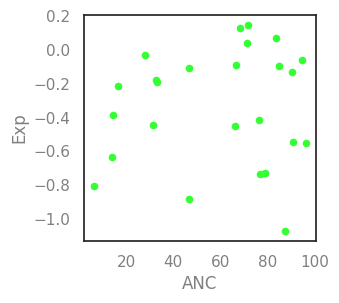

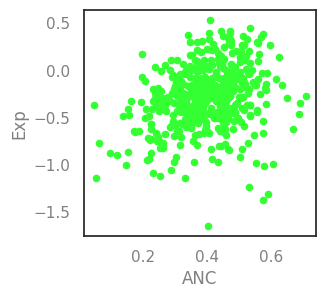

In [50]:
res_alt2 = {}
for id1 in whole_dataset:
    ana = bone.IBDAnalysis()
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    wt1, l1 = [1], [alt2]
    ana.order = ana.h.aRange()
    ana.orderData(l1, wt1)
    expr = ["", ""] + list(ana.f_ranks)
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,ax = plt.subplots(figsize=(3,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=ax)
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    res_alt2[id1[0]] = corr1

In [25]:
np.mean(list(res_alt2.values()))

0.11786897338557416

In [54]:
scipy.stats.ttest_ind(list(res_alt1.values()), list(res_becc.values()), equal_var=False)

Ttest_indResult(statistic=-5.372253769007198, pvalue=1.8506287756246903e-05)

In [53]:
scipy.stats.ttest_ind(list(res_alt2.values()), list(res_becc.values()), equal_var=False)

Ttest_indResult(statistic=-6.2802811726363545, pvalue=3.2169129395582935e-06)

In [55]:
scipy.stats.ttest_ind(list(res_alt3.values()), list(res_becc.values()), equal_var=False)

Ttest_indResult(statistic=-3.0078242428836015, pvalue=0.008696488334790718)

In [56]:
scipy.stats.ttest_ind(list(res_alt4.values()), list(res_becc.values()), equal_var=False)

Ttest_indResult(statistic=-1.4504969596911106, pvalue=0.15990530002681644)

In [57]:
scipy.stats.ttest_ind(list(res_LM22.values()), list(res_becc.values()), equal_var=False)

Ttest_indResult(statistic=-0.6920877922424074, pvalue=0.4955818243671022)

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
[1]
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
[1]
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
[1]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[1]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[1]
Kho 2022 asthma (n = 46)
GSE184433 http://hege

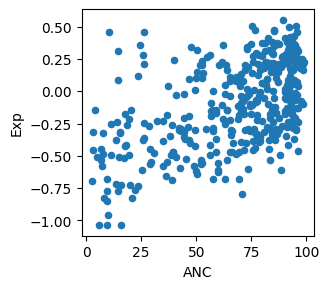

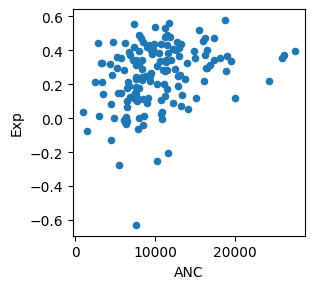

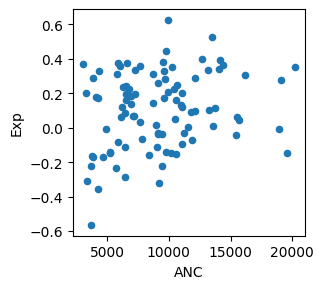

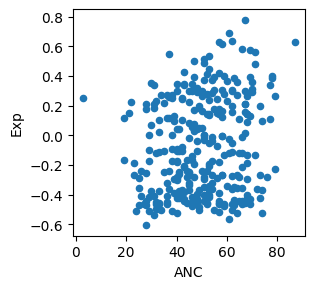

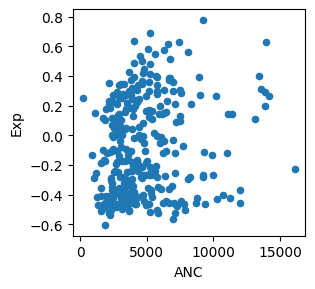

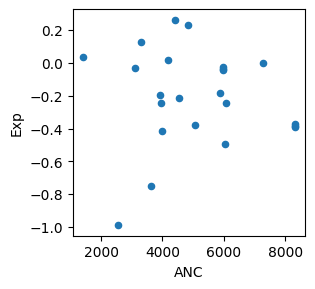

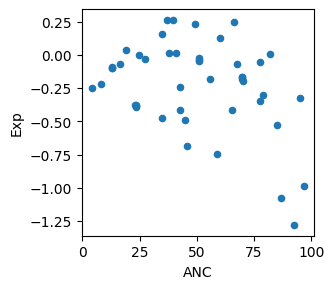

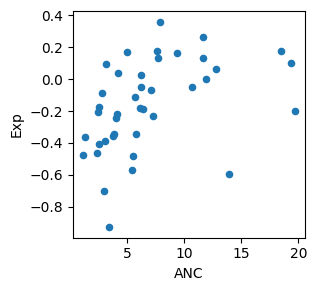

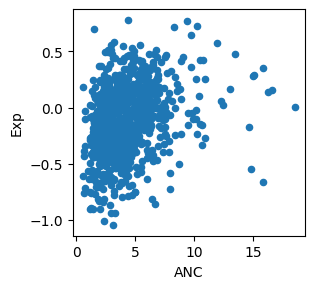

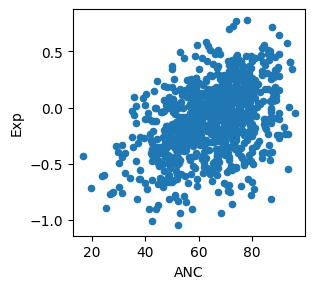

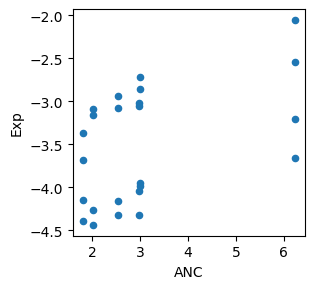

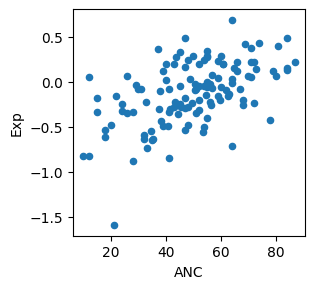

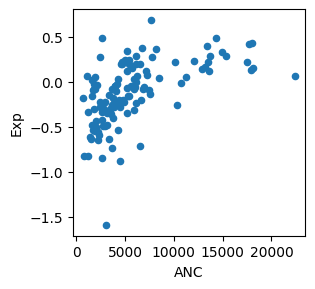

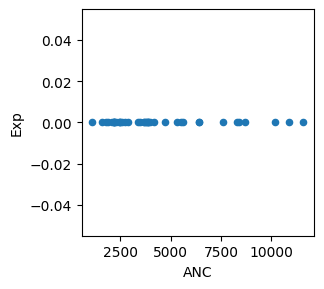

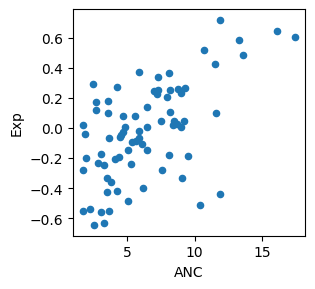

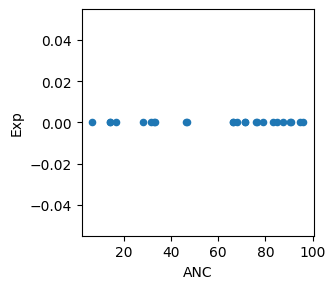

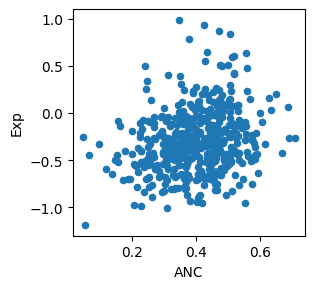

In [26]:
res_alt3 = {}
for id1 in whole_dataset:
    ana = bone.IBDAnalysis()
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    wt1, l1 = [1], [alt3]
    ana.order = ana.h.aRange()
    ana.orderData(l1, wt1)
    expr = ["", ""] + list(ana.f_ranks)
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,ax = plt.subplots(figsize=(3,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=ax)
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    res_alt3[id1[0]] = corr1

In [29]:
res_alt3

{'COV192': 0.5393292086481746,
 'COV247': 0.30247251355080634,
 'COV257': 0.2248429337348878,
 'COV314': 0.1806160467695435,
 'MACV296': -0.3694888866134385,
 'MACV306': 0.42543535589986964,
 'MACV307': 0.42174430343681374,
 'MACV308': 0.482826436828001,
 'MACV309': 0.5492613623928468,
 'MACV310': masked,
 'COV429': 0.5766182499297418,
 'MACV331': masked,
 'MACV332': 0.2228918943635926}

In [38]:
res_alt3 = {'COV192': 0.5393292086481746,
 'COV247': 0.30247251355080634,
 'COV257': 0.2248429337348878,
 'COV314': 0.1806160467695435,
 'MACV296': -0.3694888866134385,
 'MACV306': 0.42543535589986964,
 'MACV307': 0.42174430343681374,
 'MACV308': 0.482826436828001,
 'MACV309': 0.5492613623928468,
 'COV429': 0.5766182499297418,
 'MACV332': 0.2228918943635926}

np.mean(list(res_alt3.values()))

0.32332267444916724

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
[8]
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
[8]
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
[8]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[8]
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
[8]
Kho 2022 asthma (n = 46)
GSE184433 http://hege

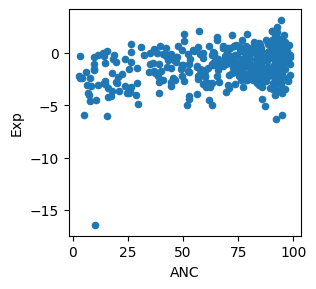

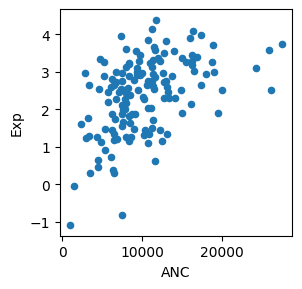

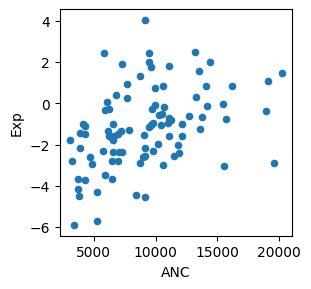

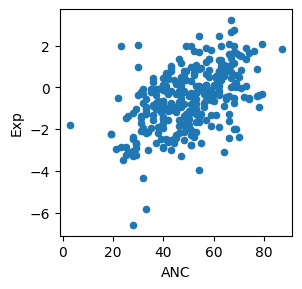

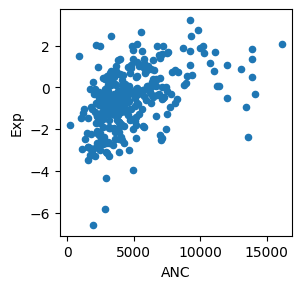

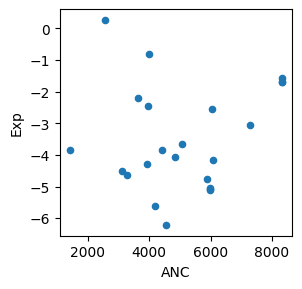

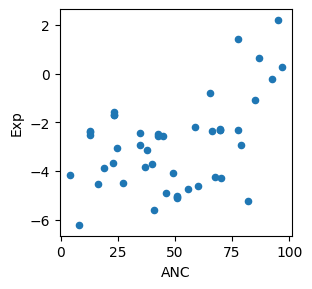

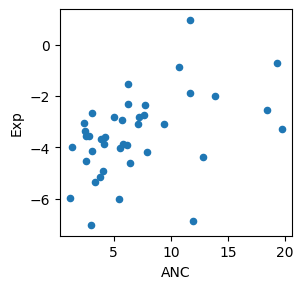

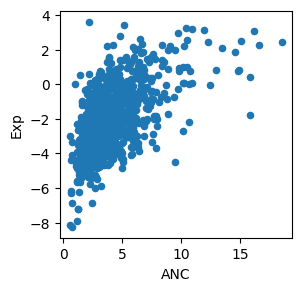

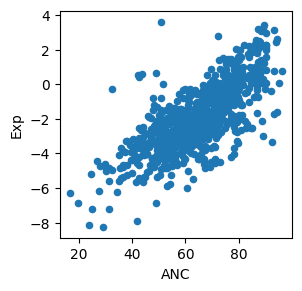

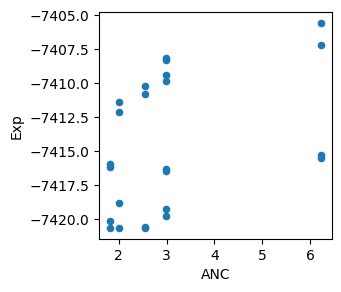

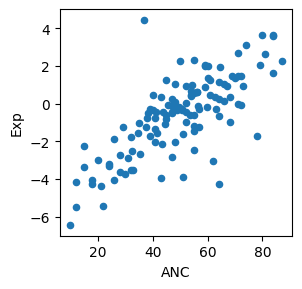

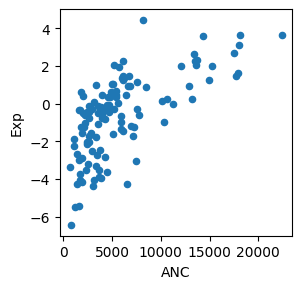

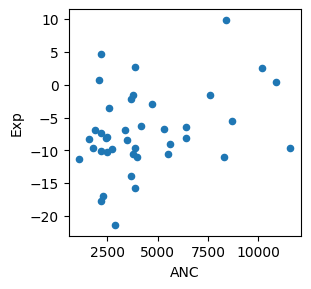

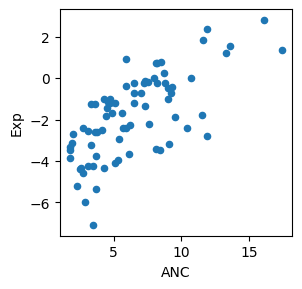

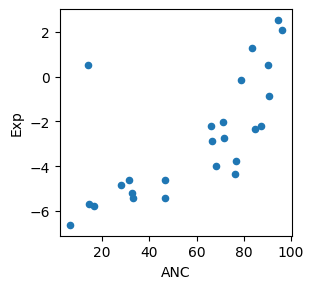

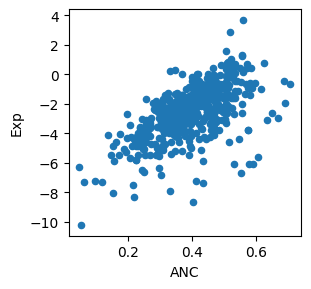

In [13]:
res_alt4 = {}
for id1 in whole_dataset:
    ana = bone.IBDAnalysis()
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    wt1, l1 = [1], [alt4]
    ana.order = ana.h.aRange()
    ana.orderData(l1, wt1)
    expr = ["", ""] + list(ana.f_ranks)
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,ax = plt.subplots(figsize=(3,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=ax)
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    res_alt4[id1[0]] = corr1

In [14]:
res_alt4

{'COV192': 0.31490704897518584,
 'COV247': 0.4738125482510911,
 'COV257': 0.4099766229450098,
 'COV314': 0.4607726196494928,
 'MACV296': 0.45574724822816026,
 'MACV306': 0.4322300367515755,
 'MACV307': 0.7388514075691198,
 'MACV308': 0.4137048591926744,
 'MACV309': 0.6613247270961193,
 'MACV310': 0.3364669756516243,
 'COV429': 0.6951053769653295,
 'MACV331': 0.6949605937601504,
 'MACV332': 0.6013320352292415}

In [15]:
np.mean(list(res_alt4.values()))

0.5145532384819056

In [34]:
#alt4 LM22 

Morrow 2019 copd (n = 63)
GSE124180 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV305
0 [0, 0] GSE124180 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV305 MACV305
[54]


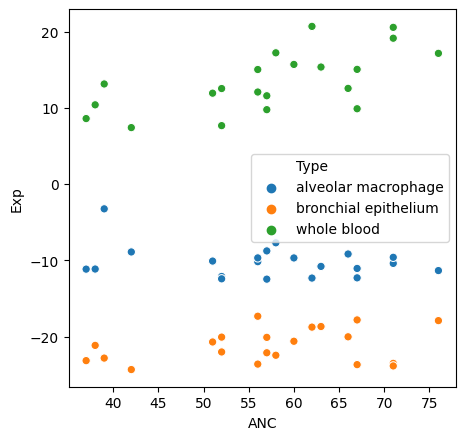

In [35]:
dataset = ["MACV305", 'c neutrophl_pct']
ana = NeuAnalysis()
ana.getSurvival(dataset[0])
wbc = ana.h.getSurvName(dataset[1])
wt1, l1 = [1], [LM22]
ana.order = ana.h.aRange()
ana.orderData(l1, wt1)
expr = ["", ""] + list(ana.f_ranks)
df = pd.DataFrame()
ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
         'unknown':1, 'Missing Data':1}
df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
df['Exp'] = pd.to_numeric(expr[2:])
atype = ana.h.getSurvName('c cell type')
df['Type'] = atype[2:]
fig,ax = plt.subplots(figsize=(5,5), dpi=100)
sns.scatterplot(data=df, x='ANC', y='Exp', hue='Type', ax=ax)

0.6455894379457328


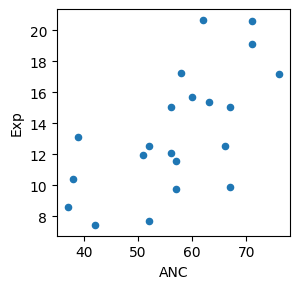

In [36]:
df = df[df['Type'] == 'whole blood']
fig,ax = plt.subplots(figsize=(3,3), dpi=100)
df.plot.scatter('ANC', 'Exp', ax=ax)
print(ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1])

Morrow 2019 copd (n = 63)
GSE124180 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV305
0 [0, 0] GSE124180 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV305 MACV305
[8]


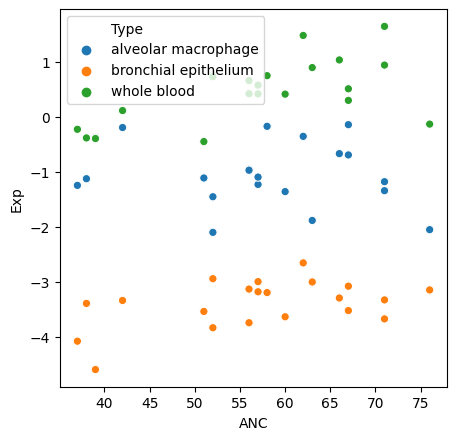

In [37]:
dataset = ["MACV305", 'c neutrophl_pct']
ana = NeuAnalysis()
ana.getSurvival(dataset[0])
wbc = ana.h.getSurvName(dataset[1])
wt1, l1 = [1], [alt4]
ana.order = ana.h.aRange()
ana.orderData(l1, wt1)
expr = ["", ""] + list(ana.f_ranks)
df = pd.DataFrame()
ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
         'unknown':1, 'Missing Data':1}
df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
df['Exp'] = pd.to_numeric(expr[2:])
atype = ana.h.getSurvName('c cell type')
df['Type'] = atype[2:]
fig,ax = plt.subplots(figsize=(5,5), dpi=100)
sns.scatterplot(data=df, x='ANC', y='Exp', hue='Type', ax=ax)

0.5913252003742357


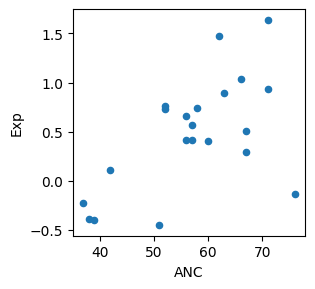

In [38]:
df = df[df['Type'] == 'whole blood']
fig,ax = plt.subplots(figsize=(3,3), dpi=100)
df.plot.scatter('ANC', 'Exp', ax=ax)
print(ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1])

Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
[13]


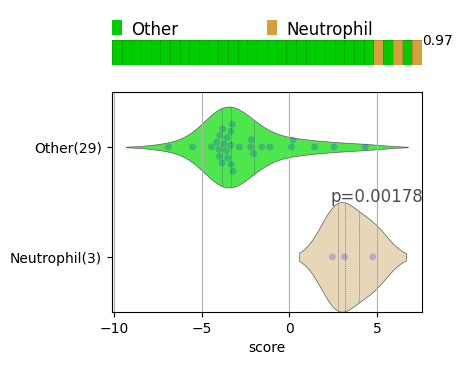

In [40]:
genes = alt4
ana = NeuAnalysis()
ana.getJeffrey2006(tn=2)
fig = bone.processData(ana, [genes], [1], None, 1)

Novershtern 2011 Human Hematopoiesis (n = 211)
GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19
211 [203, 8] GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19 G19
[84]


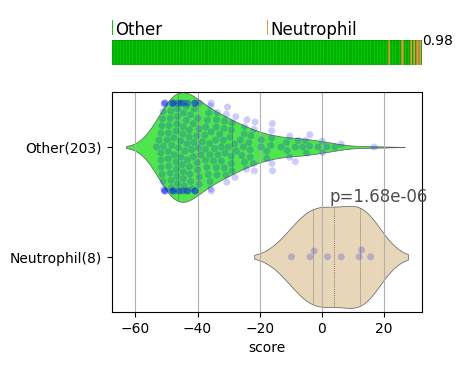

In [18]:
genes = LM22
ana = NeuAnalysis()
ana.getNorvershtern2011(tn=2)
fig = bone.processData(ana, [genes], [1], None, 1)

['ITGAM', 'FCGR3A', 'CEACAM8']
Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
[3]
Novershtern 2011 Human Hematopoiesis (n = 211)
GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19
211 [203, 8] GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19 G19
[4]
Monaco 2017 Immune Cells RNA-seq (n = 127)
GSE107011 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU12
127 [123, 4] GSE107011 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU12 NEU12
[3]
Allantaz 2011 Neu Eos (n = 33)
GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6
33 [28, 5] GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6 NEU6
[2]
['FCGR3A']
Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?k

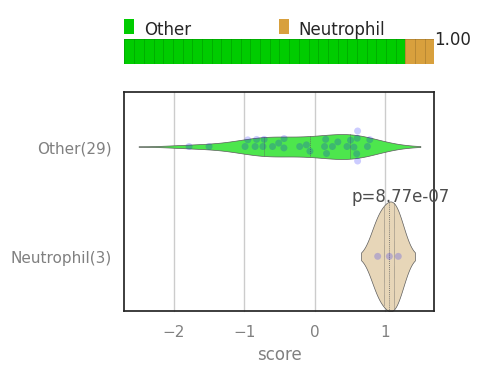

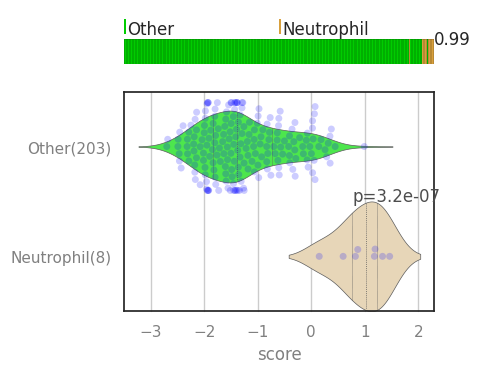

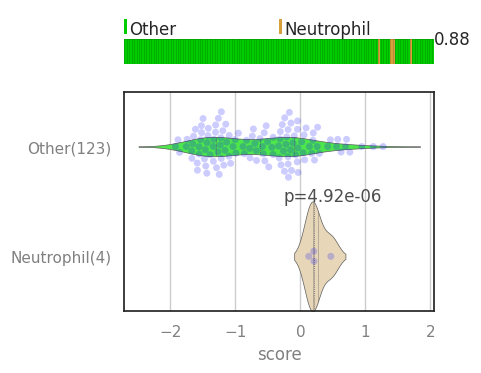

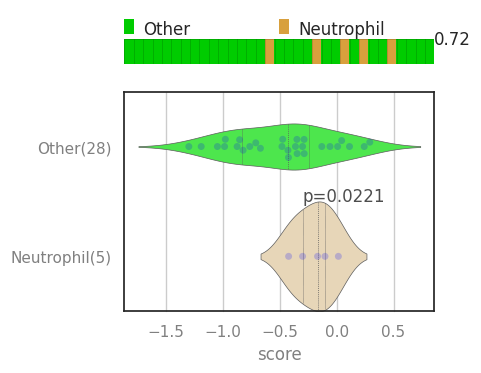

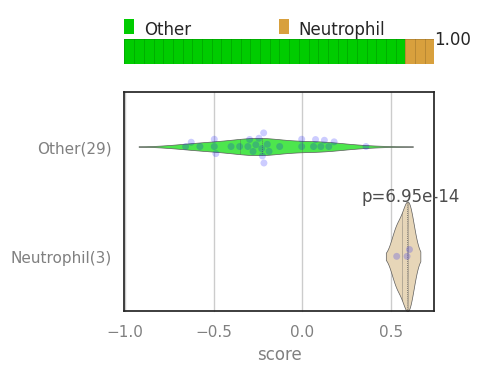

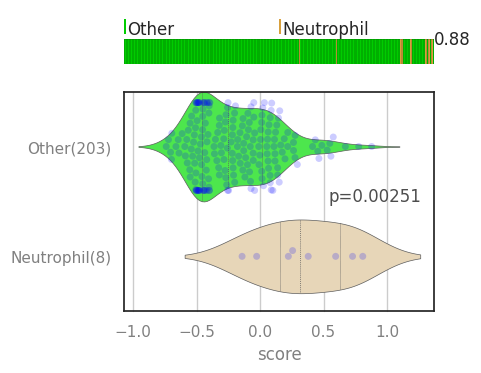

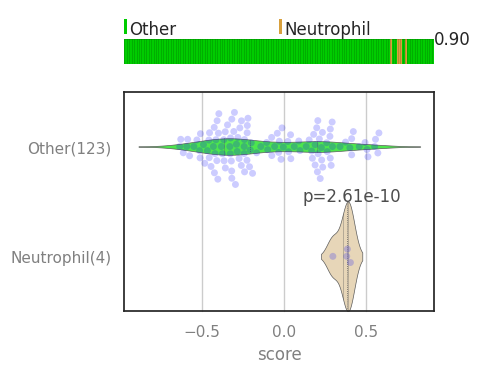

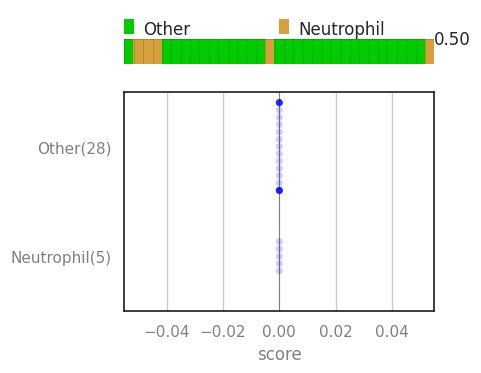

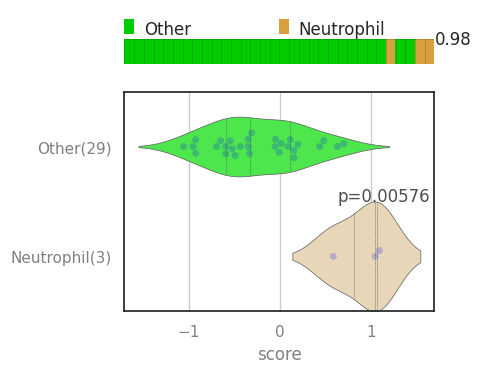

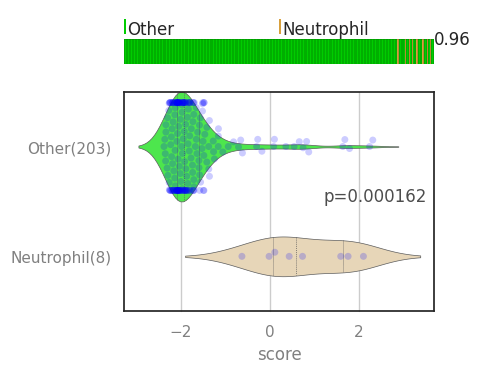

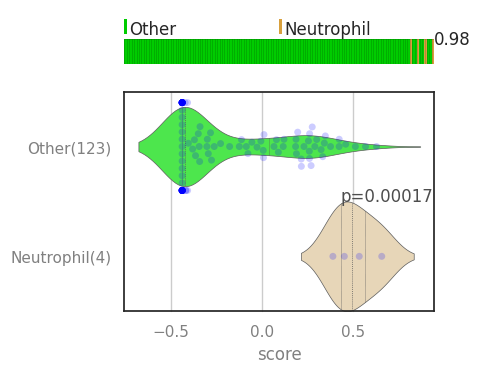

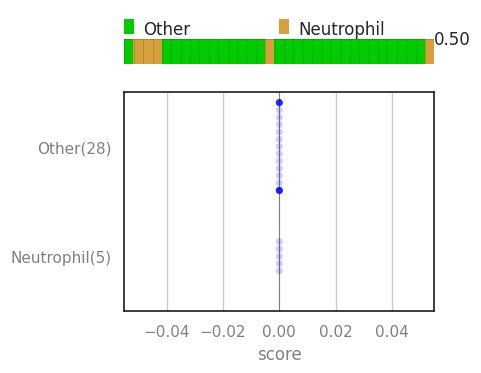

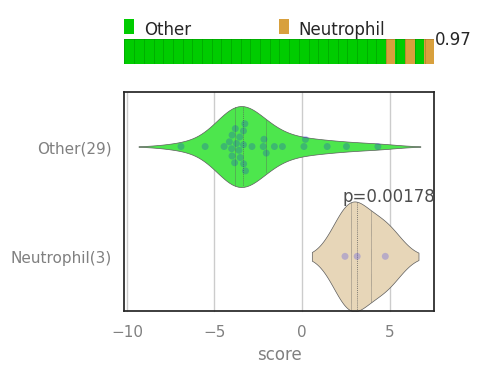

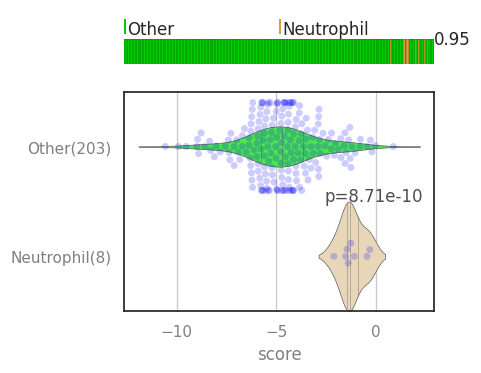

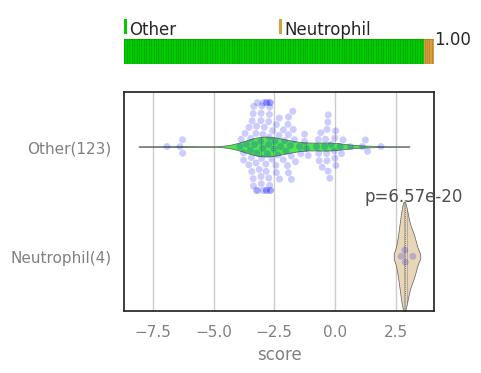

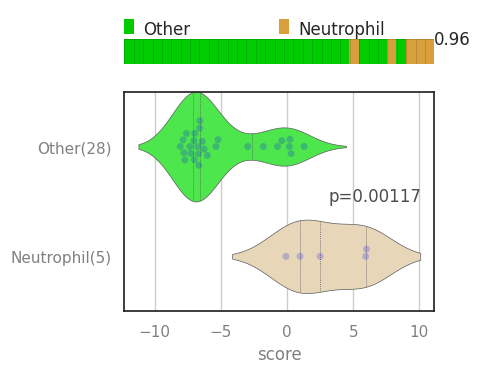

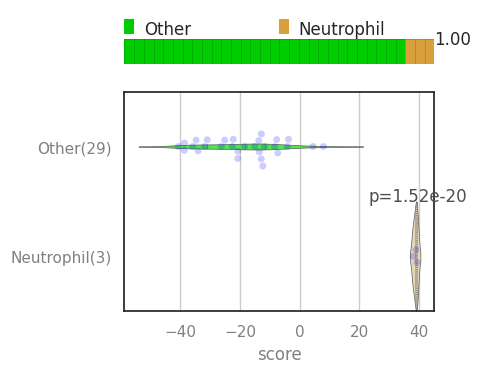

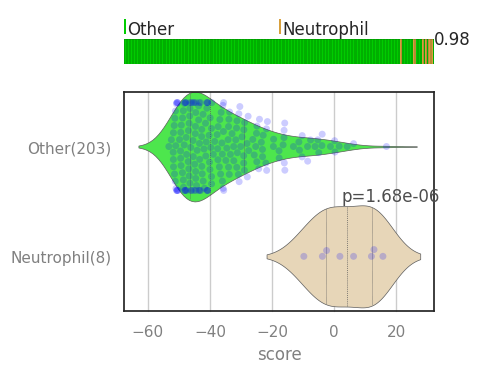

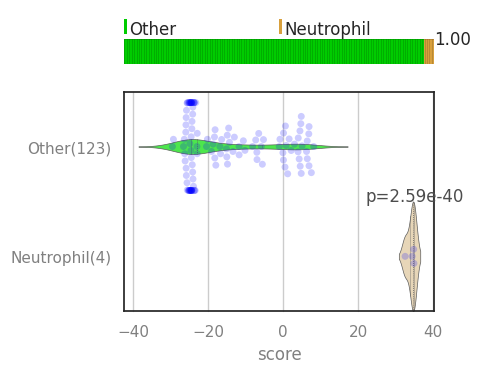

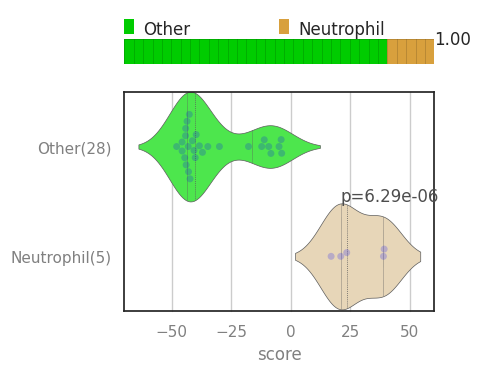

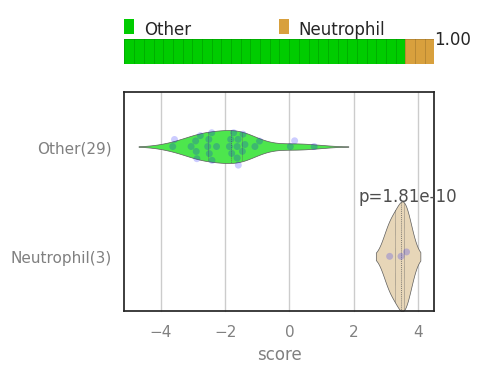

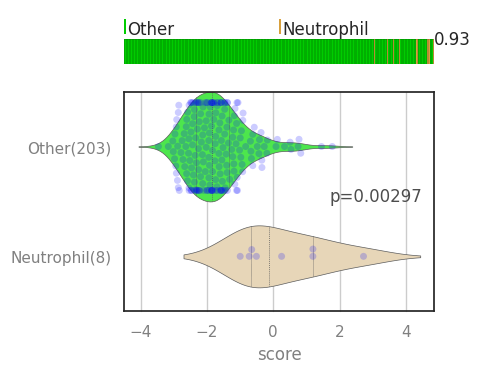

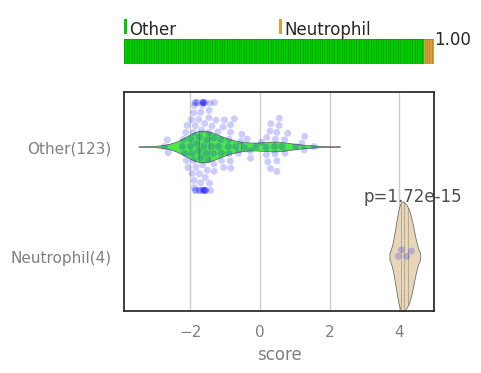

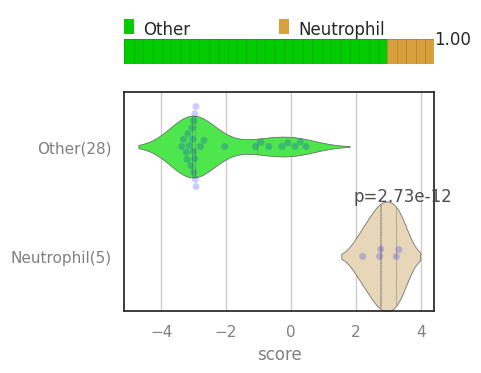

In [40]:
lists = [alt1, alt2, alt3, alt4, LM22, becc]
ana = NeuAnalysis()
for lst in lists:
    genes = lst
    print(lst)
    ana.getJeffrey2006(tn=2)
    fig = bone.processData(ana, [genes], [1], None, 1)
    
    ana.getNorvershtern2011(tn=2)
    fig = bone.processData(ana, [genes], [1], None, 1)
    
    ana.getMonaco2017(tn=6)
    fig = bone.processData(ana, [genes], [1], None, 1)
    
    ana.getAllantaz2011(tn=2)
    fig = bone.processData(ana, [genes], [1], None, 1)

Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
[90]


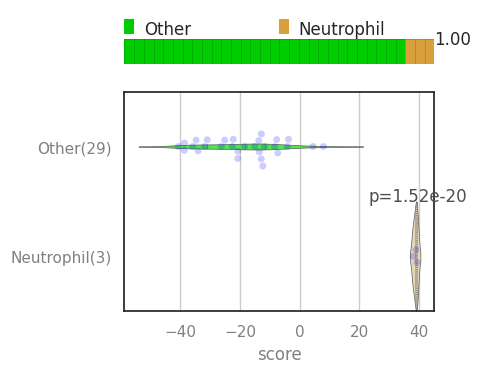

In [41]:
genes = LM22
ana = NeuAnalysis()
ana.getJeffrey2006(tn=2)
fig = bone.processData(ana, [genes], [1], None, 1)

Monaco 2017 Immune Cells RNA-seq (n = 127)
GSE107011 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU12
127 [123, 4] GSE107011 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU12 NEU12
[56]


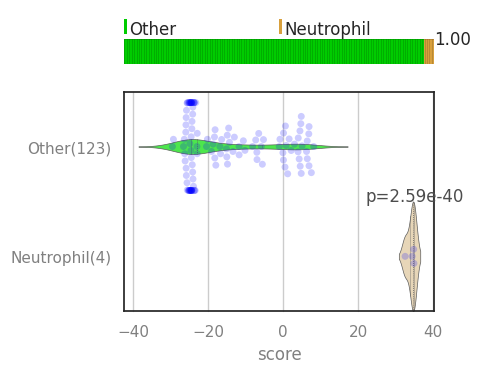

In [42]:
ana.getMonaco2017(tn=6)
fig = bone.processData(ana, [LM22], [1], None, 1)

Monaco 2017 Immune Cells RNA-seq (n = 127)
GSE107011 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU12
127 [123, 4] GSE107011 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU12 NEU12
[8]


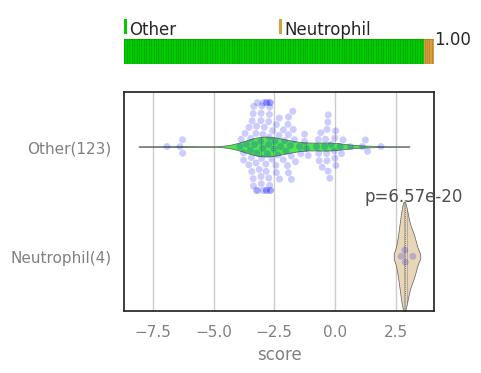

In [43]:
ana.getMonaco2017(tn=6)
fig = bone.processData(ana, [alt4], [1], None, 1)

Allantaz 2011 Neu Eos (n = 33)
GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6
33 [28, 5] GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6 NEU6
[16]


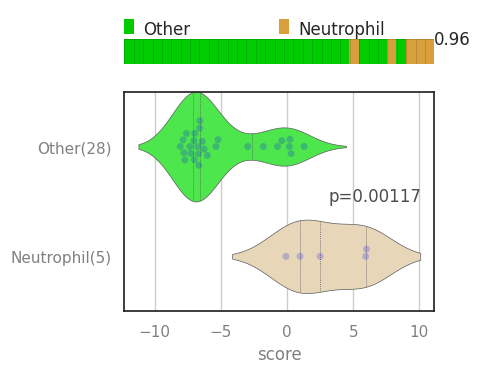

In [44]:
ana.getAllantaz2011(tn=2)
fig = bone.processData(ana, [alt4], [1], None, 1)

Allantaz 2011 Neu Eos (n = 33)
GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6
33 [28, 5] GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6 NEU6
[90]


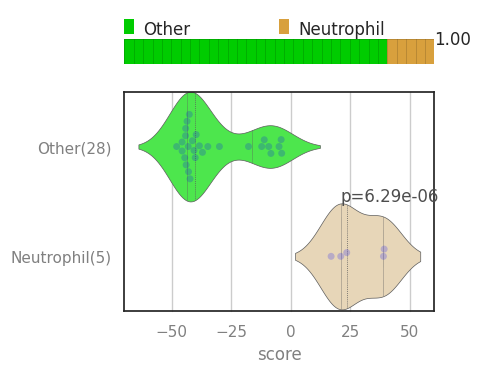

In [45]:
ana.getAllantaz2011(tn=2)
fig = bone.processData(ana, [LM22], [1], None, 1)

In [20]:
def findCorr(gene, showplots=False):
    res = {}
    for id1 in whole_dataset:
        ana.getSurvival(id1[0])
        wbc = ana.h.getSurvName(id1[1])
        expr = ana.h.getExprData(gene)
        df = pd.DataFrame()
        ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
                 'unknown':1, 'Missing Data':1}
        df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
        df['Exp'] = pd.to_numeric(expr[2:])
        if showplots:
            fig,ax = plt.subplots(figsize=(3,3), dpi=100)
            df.plot.scatter('ANC', 'Exp', ax=ax)
        corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
        res[id1[0]] = corr1
    return res

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


nan

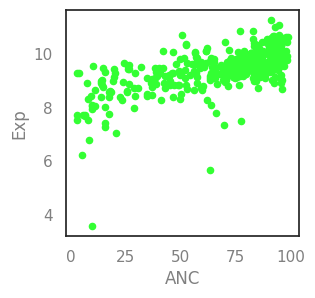

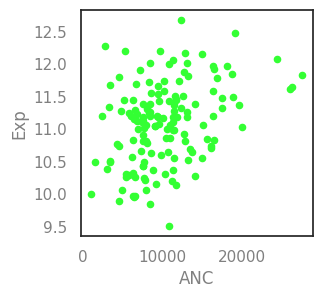

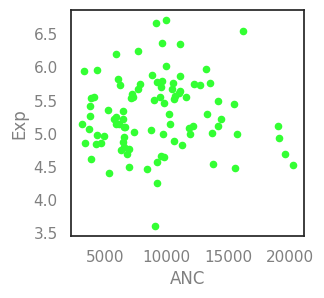

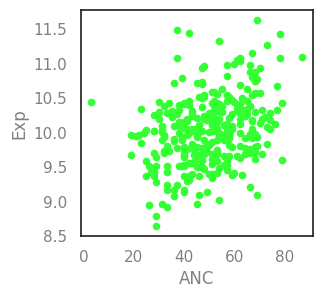

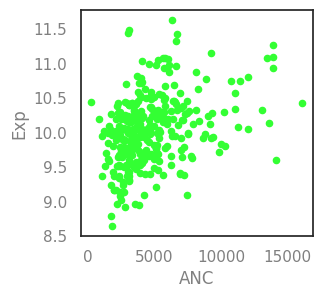

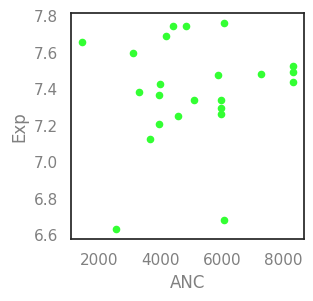

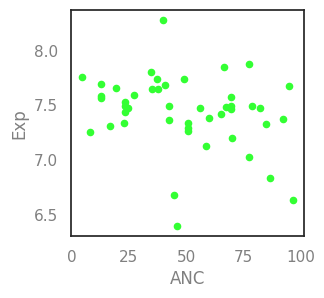

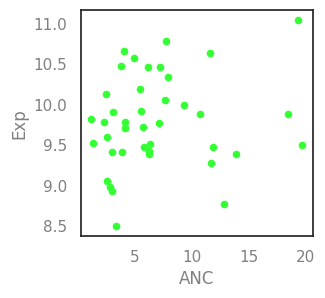

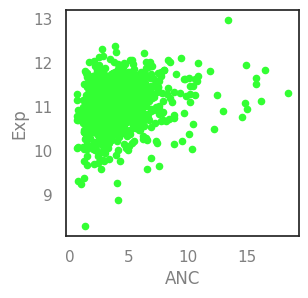

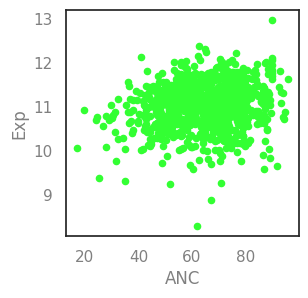

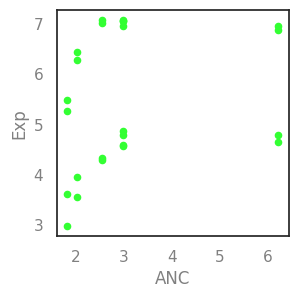

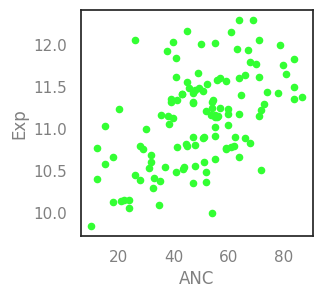

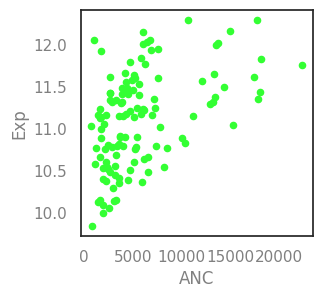

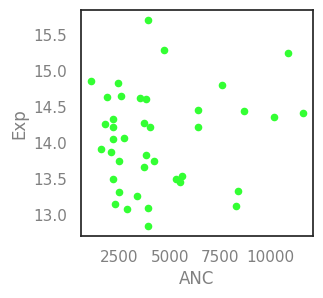

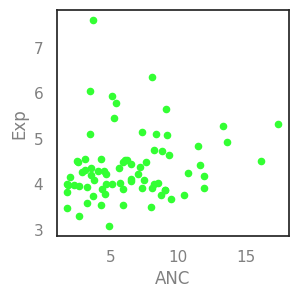

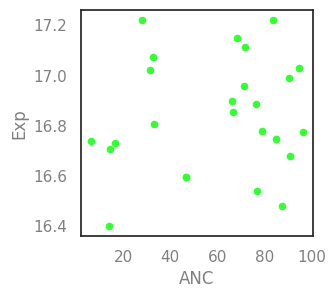

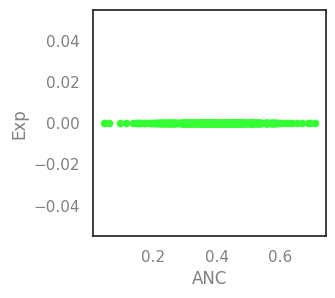

In [48]:
csf3rdict = findCorr(LM22[0], showplots=True)

In [65]:
alt4_0 = findCorr(alt4[0], showplots=False)
alt4_0

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/e

{'COV192': 0.5476928204356747,
 'COV247': 0.4819833656854907,
 'COV257': 0.4569920579223522,
 'COV314': -0.09068076325721368,
 'MACV296': 0.29163309728651504,
 'MACV306': 0.17177291419139384,
 'MACV307': 0.6182741017151606,
 'MACV308': 0.37720748134729626,
 'MACV309': 0.5576854593465409,
 'MACV310': 0.20534984077577534,
 'COV429': 0.545186372881441,
 'MACV331': 0.7882077150780175,
 'MACV332': 0.6310461853443827}

In [69]:
alt4_1 = findCorr(alt4[1], showplots=False)
np.mean(list(alt4_1.values()))

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/e

0.31972226741324844

In [70]:
alt4_2 = findCorr(alt4[2], showplots=False)
np.mean(list(alt4_2.values()))

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/e

0.16714176457233648

In [74]:
dic_alt4={}
for i in range(len(alt4)):
    print(alt4[i])
    temp = findCorr(alt4[i], showplots=False)
    dic_alt4[alt4[i]]=np.mean(list(temp.values()))
dic_alt4

CMTM2
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/T

Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.

Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tool

Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332


{'CMTM2': 0.42941158836560206,
 'FOS': 0.31972226741324844,
 'PIK3CB': 0.16714176457233648,
 'SOS2': 0.34493603873404083,
 'TLR4': 0.4352525643622007,
 'IL18R1': 0.31595333073871995,
 'CMTM6': 0.4196961353392832,
 'FPR1': 0.5243511123303117}

In [21]:
dic_LM22={}
for i in range(len(LM22)):
    print(LM22[i])
    try:
        temp = findCorr(LM22[i], showplots=False)
    except:
        continue
    dic_LM22[LM22[i]]=np.mean(list(temp.values()))
dic_LM22

AIF1
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/To

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/e

Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.

Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tool

Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
CEACAM3
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hege

Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.u

Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.e

Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/

Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.u

Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
GPR97
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
HAL
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http:/

Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.u

Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
LILRB2
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu

Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucs

Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/

Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
NCF2
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://he

Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.e

Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
PGLYRP1
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.uc

Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Shin 2014 blood (n = 47)
GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308
0 [0, 0] GSE53655 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV308 MACV308
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.uc

Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.ph

Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Banchereau 2012 blood (n = 143)
GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309
0 [0, 0] GSE30119 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV309 MACV309
Devignot 2010 dengue (n = 48)
GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310
0 [0, 0] GSE17924 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV310 MACV310
Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd

Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296
0 [0, 0] GSE184433 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV296 MACV296
Nallandhighal 2018 blood (n = 46)
GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306
0 [0, 0] GSE117613 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV306 MACV306
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307
0 [0, 0] GSE65391 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV307 MACV307
Banchereau 2016 sle (n = 996)
GSE65391 http://hegemon.ucsd.ed

Prebensen 2023 cov (n = 94)
GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429
0 [0, 0] GSE213313 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV429 COV429
Groth 2020 sputum (n = 25)
GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331
0 [0, 0] GSE148004 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV331 MACV331
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
VNN2
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.u

{'AIF1': nan,
 'APOBEC3A': 0.22924276632355595,
 'AQP9': 0.5446806676229964,
 'BTNL8': 0.3341126184322772,
 'C5AR1': 0.4648707897117692,
 'CAMP': 0.1186887127528043,
 'CASP5': 0.3690587997734103,
 'CCR3': nan,
 'CDA': 0.37663853380844325,
 'CEACAM3': 0.4375431726421706,
 'CFP': 0.2933591624511439,
 'CHI3L1': 0.17167107154012246,
 'CLC': -0.16314371381974307,
 'CREB5': nan,
 'CSF3R': 0.511306381076961,
 'DPEP2': 0.08169064418976767,
 'FFAR2': 0.3852295655735408,
 'FPR1': 0.5243511123303117,
 'FPR2': 0.47791755681781584,
 'HAL': 0.3693893867281685,
 'HSPA6': 0.4196814112836663,
 'IGSF6': 0.44601569073258873,
 'IL18RAP': 0.36810960481671284,
 'LILRA2': 0.37422716078495594,
 'LILRB2': 0.32257005504125674,
 'LST1': 0.2761798511570873,
 'MAK': 0.4119752635577313,
 'MEFV': 0.4030658560686508,
 'MGAM': 0.3380254117584078,
 'MMP25': 0.38825482853031723,
 'MNDA': 0.28699946177751323,
 'MXD1': 0.5203762407276997,
 'NCF2': 0.3552046045520996,
 'NFE2': 0.37861714543570485,
 'P2RY13': 0.354530378659

In [27]:
sorted(dic_LM22.items(), key=lambda x:x[1])

[('AIF1', nan),
 ('CLC', -0.16314371381974307),
 ('P2RY14', 0.06032877862311879),
 ('DPEP2', 0.08169064418976767),
 ('CAMP', 0.1186887127528043),
 ('PLEKHG3', 0.1290053226850843),
 ('CHI3L1', 0.17167107154012246),
 ('APOBEC3A', 0.22924276632355595),
 ('LST1', 0.2761798511570873),
 ('MNDA', 0.28699946177751323),
 ('CFP', 0.2933591624511439),
 ('LILRB2', 0.32257005504125674),
 ('BTNL8', 0.3341126184322772),
 ('MGAM', 0.3380254117584078),
 ('TREML2', 0.35117723096487075),
 ('PADI4', 0.3519226153094421),
 ('P2RY13', 0.35453037865932846),
 ('NCF2', 0.3552046045520996),
 ('PGLYRP1', 0.3650488396355902),
 ('IL18RAP', 0.36810960481671284),
 ('CASP5', 0.3690587997734103),
 ('HAL', 0.3693893867281685),
 ('TNFAIP6', 0.3705969415154255),
 ('VNN1', 0.3729081942122078),
 ('LILRA2', 0.37422716078495594),
 ('CDA', 0.37663853380844325),
 ('NFE2', 0.37861714543570485),
 ('S100A12', 0.3842957930733918),
 ('FFAR2', 0.3852295655735408),
 ('MMP25', 0.38825482853031723),
 ('TNFRSF10C', 0.39218536700861156),


In [28]:
lm22_top = ['FPR1', 'AQP9', 'MXD1', 'CSF3R', 'FPR2', 'TLR2']

Novershtern 2011 Human Hematopoiesis (n = 211)
GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19
211 [203, 8] GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19 G19
[7]


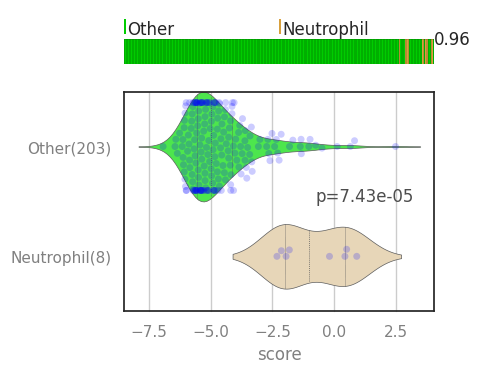

In [31]:
genes = lm22_top
ana = NeuAnalysis()
ana.getNorvershtern2011(tn=2)
fig = bone.processData(ana, [genes], [1], None, 1)

In [26]:
dic_LM22.values()

dict_values([nan, 0.22924276632355595, 0.5446806676229964, 0.3341126184322772, 0.4648707897117692, 0.1186887127528043, 0.3690587997734103, nan, 0.37663853380844325, 0.4375431726421706, 0.2933591624511439, 0.17167107154012246, -0.16314371381974307, nan, 0.511306381076961, 0.08169064418976767, 0.3852295655735408, 0.5243511123303117, 0.47791755681781584, 0.3693893867281685, 0.4196814112836663, 0.44601569073258873, 0.36810960481671284, 0.37422716078495594, 0.32257005504125674, 0.2761798511570873, 0.4119752635577313, 0.4030658560686508, 0.3380254117584078, 0.38825482853031723, 0.28699946177751323, 0.5203762407276997, 0.3552046045520996, 0.37861714543570485, 0.35453037865932846, 0.06032877862311879, 0.3519226153094421, 0.3650488396355902, 0.1290053226850843, 0.3970239311192406, 0.4614626481804114, 0.3842957930733918, 0.40716000436840477, 0.4719165859258548, 0.4360305607964846, 0.3705969415154255, 0.39218536700861156, 0.4102683473037375, 0.35117723096487075, 0.3729081942122078, 0.394711630012

In [83]:
ls=[i for i in list(dic_LM22.values()) if i>0.4]

In [84]:
len(ls)

17

In [89]:
dic_becc={}
for i in range(len(becc)):

    try:
        temp = findCorr(becc[i], showplots=False)
    except: 
        print(becc[i])
        continue
    dic_becc[becc[i]]=np.mean(list(temp.values()))
dic_becc

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Kho 2022 asthma (n = 46)
GSE184433 http://hegemon.ucsd.edu/Tools/e

Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] GSE178491 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/

{'KCNJ15': 0.36219484615965836,
 'DYSF': 0.533405854319995,
 'BASP1': 0.5383413156053248,
 'TNFRSF1A': 0.4638973390280098}